
Conclusion: 
* accuracy: inflect package achieve 100% accuracy on  on the DIAG dataset 
| method      | to singular | to plural    |
| :---        |    :----:   |          ---: |
| inflection      | 96%       | 91%   |
| inflect   | 98.9%        | 98.4%    |
| pyinflect   | 91%        | 93%    |
* speed: the python package inflect are much faster than the inflection.py

**We decide to use the inflect module**

Reference: 
1. https://skeptric.com/making-words-singular/https://skeptric.com/making-words-singular/

# Check the python package inflect

In [35]:
!pip install inflect

In [2]:
import pandas as pd
import inflect

p = inflect.engine()
p.classical(all=True)  # USE ALL CLASSICAL PLURALS

def read_data(path = '../data/BLESS/bless.csv'):

    df = pd.read_csv(path, sep=';', names=['sub_label', 'obj_label', 'relation'])
    query_relation = ['coord', 'hyper']
    df = df.query(f"relation in {query_relation}")

    display(df['relation'].value_counts())
    return df 

df = read_data()

df['sub_label_sg'] = df['sub_label'].apply(lambda x:  p.singular_noun(x) if p.singular_noun(x)!=False else x)
df['sub_label_pl'] = df['sub_label'].apply(lambda x: p.plural_noun(x) if p.plural_noun(x)!=False else x)

df[['sub_label', 'sub_label_sg', 'sub_label_pl']].sample(10)
# p.plural(word)
# p.plural_noun("I", N1),
# print(p.singular_noun("they"))  # 'it'

coord    3602
hyper    1279
Name: relation, dtype: int64

,sub_label,sub_label_sg,sub_label_pl
24739,cannon,cannon,cannons
2068,dove,dove,doves
2477,hawk,hawk,hawks
3144,sparrow,sparrow,sparrows
18858,corn,corn,corns
22402,tanker,tanker,tankers
11207,cow,cow,kine
13364,sheep,sheep,sheep
2042,dove,dove,doves
1169,radio,radio,radios


In [23]:
df[['sub_label', 'sub_label_sg', 'sub_label_pl']].sample(20)

,sub_label,sub_label_sg,sub_label_pl
9483,strawberry,strawberry,strawberries
3227,swan,swan,swans
8164,mug,mug,mugs
17039,shovel,shovel,shovels
18750,celery,celery,celeries
20400,bus,bu,buses
138,frog,frog,frogs
12914,pig,pig,pigs
18351,beet,beet,beets
18353,beet,beet,beets


## lemminflect

https://github.com/bjascob/LemmInflecthttps://github.com/bjascob/LemmInflect

https://lhncbc.nlm.nih.gov/LSG/Projects/lexicon/current/web/index.htmlhttps://lhncbc.nlm.nih.gov/LSG/Projects/lexicon/current/web/index.html 

https://lemminflect.readthedocs.io/en/latest/inflections/

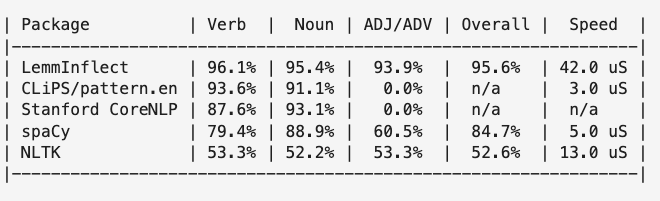
Note that a more sophisticated system now exists in **LemmInflect** which includes both lemmatization and inflection, along with more advanced methods for word form disambiguation. You might want to try that module first if you're looking for top performance.

This module is designed as an extension for spaCy and will return the the inflected form of a word based on a supplied Penn Treekbank part-of-speech tag. It can also be used a standalone module outside of Spacy. It is based on the Automatically Generated Inflection Database (AGID). The AGID data provides a list of inflections for various word lemma. See the scripts directory for utilities that make good examples or the tests directory for unit tests / examples.Note that a more sophisticated system now exists in LemmInflect which includes both lemmatization and inflection, along with more advanced methods for word form disambiguation. You might want to try that module first if you're looking for top performance.

This module is designed as an extension for spaCy and will return the the inflected form of a word based on a supplied Penn Treekbank part-of-speech tag. It can also be used a standalone module outside of Spacy. It is based on the Automatically Generated Inflection Database (AGID). The AGID data provides a list of inflections for various word lemma. See the scripts directory for utilities that make good examples or the tests directory for unit tests / examples.

Note that the original verion lemminflect perform better than the spacy version on the -ing NOUNs (e.g., reading, jogging)

In [23]:
from lemminflect import getInflection

import spacy
import lemminflect
nlp = spacy.load('en_core_web_sm')


path = '../data/probe-generalization/Syntagmatic/LM-Diagnostic-Extended/singular_plural.tsv'
df = pd.read_csv(path, sep='\t', names=['mask_sentences_sg', 'obj_label_sg', 'mask_sentences_pl', 'obj_label_pl'])

df['sub_label_sg'] = df['mask_sentences_sg'].apply(lambda x: x.split()[1])
df['sub_label_pl'] = df['mask_sentences_pl'].apply(lambda x: x.split()[0])

df['sub_label_sg_sg'] = df['sub_label_sg'].apply(lambda x: getInflection(x, tag='NN')[0] )
df['sub_label_pl_sg'] = df['sub_label_pl'].apply(lambda x: getInflection(x, tag='NN')[0] )
df['sub_label_sg_pl'] = df['sub_label_sg'].apply(lambda x: getInflection(x, tag='NNS')[0] )
df['sub_label_pl_pl'] = df['sub_label_pl'].apply(lambda x: getInflection(x, tag='NNS')[0] )

pairs = {
    "sg -> sg": ['sub_label_sg', 'sub_label_sg_sg'], 
    "pl -> sg": ['sub_label_sg', 'sub_label_pl_sg'], 
    "sg -> pl": ['sub_label_pl', 'sub_label_sg_pl'],
    "pl -> pl": ['sub_label_pl', 'sub_label_pl_pl']
    }

for key, pair in pairs.items():
    dft = df.query(f"{pair[0]} == {pair[1]}")
    print(key, len(dft.index)/len(df.index))
print()
    
df['sub_label_sg_sg'] = df['sub_label_sg'].apply(lambda x: nlp(x)[0]._.inflect('NN') )
df['sub_label_pl_sg'] = df['sub_label_pl'].apply(lambda x: nlp(x)[0]._.inflect('NN') )
df['sub_label_sg_pl'] = df['sub_label_sg'].apply(lambda x: nlp(x)[0]._.inflect('NNS'))
df['sub_label_pl_pl'] = df['sub_label_pl'].apply(lambda x: nlp(x)[0]._.inflect('NNS'))

for key, pair in pairs.items():
    dft = df.query(f"{pair[0]} == {pair[1]}")
    print(key, len(dft.index)/len(df.index))

sg -> sg 1.0
pl -> sg 0.003472222222222222
sg -> pl 0.9479166666666666
pl -> pl 0.003472222222222222

sg -> sg 0.9878472222222222
pl -> sg 0.875
sg -> pl 0.9375
pl -> pl 0.890625


## Performance on the inflection.py 

In [3]:
import pandas as pd
from inflection import singularize, pluralize 

path = '../data/probe-generalization/Syntagmatic/LM-Diagnostic-Extended/singular_plural.tsv'
df = pd.read_csv(path, sep='\t', names=['mask_sentences_sg', 'obj_label_sg', 'mask_sentences_pl', 'obj_label_pl'])

df['sub_label_sg'] = df['mask_sentences_sg'].apply(lambda x: x.split()[1])
df['sub_label_pl'] = df['mask_sentences_pl'].apply(lambda x: x.split()[0])

df['sub_label_sg_sg'] = df['sub_label_sg'].apply(lambda x: singularize(x) )
df['sub_label_pl_sg'] = df['sub_label_pl'].apply(lambda x: singularize(x) )
df['sub_label_sg_pl'] = df['sub_label_sg'].apply(lambda x: pluralize(x))
df['sub_label_pl_pl'] = df['sub_label_pl'].apply(lambda x: pluralize(x))

pairs = {
    "sg -> sg": ['sub_label_sg', 'sub_label_sg_sg'], 
    "pl -> sg": ['sub_label_sg', 'sub_label_pl_sg'], 
    "sg -> pl": ['sub_label_pl', 'sub_label_sg_pl'],
    "pl -> pl": ['sub_label_pl', 'sub_label_pl_pl']
    }

for key, pair in pairs.items():
    dft = df.query(f"{pair[0]} == {pair[1]}")
    print(key, len(dft.index)/len(df.index))

sg -> sg 1.0
pl -> sg 0.875
sg -> pl 0.9305555555555556
pl -> pl 0.96875


## Performance on the inflect module 

In [2]:
import pandas as pd
import inflect
from sklearn.metrics import accuracy_score
p = inflect.engine()
p.classical(all=True)  # USE ALL CLASSICAL PLURALS

path = '../data/probe-generalization/Syntagmatic/LM-Diagnostic-Extended/singular_plural.tsv'
df = pd.read_csv(path, sep='\t', names=['mask_sentences_sg', 'obj_label_sg', 'mask_sentences_pl', 'obj_label_pl'])

df['sub_label_sg'] = df['mask_sentences_sg'].apply(lambda x: x.split()[1])
df['sub_label_pl'] = df['mask_sentences_pl'].apply(lambda x: x.split()[0])

df['sub_label_sg_sg'] = df['sub_label_sg'].apply(lambda x: p.singular_noun(x) if p.singular_noun(x)!=False else x )
df['sub_label_pl_sg'] = df['sub_label_pl'].apply(lambda x: p.singular_noun(x) if p.singular_noun(x)!=False else x )
df['sub_label_sg_pl'] = df['sub_label_sg'].apply(lambda x: p.plural_noun(x) if p.plural_noun(x)!=False else x)
df['sub_label_pl_pl'] = df['sub_label_pl'].apply(lambda x: p.plural_noun(x) if p.plural_noun(x)!=False else x)

pairs = {
    "sg -> sg": ['sub_label_sg', 'sub_label_sg_sg'], 
    "pl -> sg": ['sub_label_sg', 'sub_label_pl_sg'], 
    "sg -> pl": ['sub_label_pl', 'sub_label_sg_pl'],
    "pl -> pl": ['sub_label_pl', 'sub_label_pl_pl']
    }

for key, pair in pairs.items():
    dft = df.query(f"{pair[0]} == {pair[1]}")
    print(key, len(dft.index)/len(df.index))
    
# path = '../data/probe-generalization/Syntagmatic/LM-Diagnostic-Extended/singular_plural.tsv'
# df = pd.read_csv(path, sep='\t', names=['mask_sentences_sg', 'obj_label_sg', 'mask_sentences_pl', 'obj_label_pl'])

# df['sub_label_sg'] = df['mask_sentences_sg'].apply(lambda x: x.split()[1])
# df['sub_label_pl'] = df['mask_sentences_pl'].apply(lambda x: x.split()[0])

# y_true_sg =  list(set(df['sub_label_sg'].to_list() + df['obj_label_sg'].to_list()))
# y_true_pl =  list(set(df['sub_label_pl'].to_list() + df['obj_label_pl'].to_list()))

    
# y_pred_sg = [ p.singular_noun(x) if p.singular_noun(x)!=False else x for x in y_true_pl]
# y_pred_pl = [ p.plural_noun(x) if p.plural_noun(x)!=False else x for x in y_true_sg]

# tp_sg = set(y_true_sg).intersection(set(y_pred_sg))
# tp_pl = set(y_true_pl).intersection(set(y_pred_pl))

# print(len(tp_sg)/len(y_true_sg))
# print(len(tp_pl)/len(y_pred_pl))

# accuracy_score(y_true, y_pred, normalize=False)


# df['obj_label_sg_pred'] = df['obj_label_pl'].apply(lambda x:  p.singular_noun(x) if p.singular_noun(x)!=False else x)
# df['obj_label_pl_pred'] = df['obj_label_sg'].apply(lambda x: p.plural_noun(x) if p.plural_noun(x)!=False else x)
# display(df.head())


# print(len(df.query('obj_label_sg_pred == obj_label_sg').index)/len(df.index))
# print(len(df.query('obj_label_pl_pred == obj_label_pl').index)/len(df.index))


sg -> sg 0.9826388888888888
pl -> sg 0.9895833333333334
sg -> pl 0.984375
pl -> pl 0.003472222222222222


## pyinflect (spacy)

In [56]:
# !pip install pyinflect
!python -m spacy download en_core_web_sm
# import spacy
# spacy.download('en_core_web_md')

     |████████████████████████████████| 13.9 MB 618 kB/s eta 0:00:01
     |████████████████████████████████| 2.6 MB 21.1 MB/s eta 0:00:01
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.2
    Uninstalling pydantic-1.10.2:
      Successfully uninstalled pydantic-1.10.2
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.0.0
    Uninstalling en-core-web-sm-3.0.0:
      Successfully uninstalled en-core-web-sm-3.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 6.0.2 requires pydantic>=1.9.1, but you have pydantic 1.8.2 which is incompatible.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
import spacy
import pandas as pd
import pyinflect

nlp = spacy.load('en_core_web_sm')
word = 'buses'

def singularize(word):
    return nlp(word)[0]._.inflect('NN')
    
def pluralize(word):
    return nlp(word)[0]._.inflect('NNS')


# print(doc.tag_)                # NN
# print(doc._.inflect('NN'))    # examples
# print(doc._.inflect('NNS'))    # examples
path = '../data/probe-generalization/Syntagmatic/LM-Diagnostic-Extended/singular_plural.tsv'
df = pd.read_csv(path, sep='\t', names=['mask_sentences_sg', 'obj_label_sg', 'mask_sentences_pl', 'obj_label_pl'])

df['sub_label_sg'] = df['mask_sentences_sg'].apply(lambda x: x.split()[1])
df['sub_label_pl'] = df['mask_sentences_pl'].apply(lambda x: x.split()[0])

y_true_sg =  list(set(df['sub_label_sg'].to_list() + df['obj_label_sg'].to_list()))
y_true_pl =  list(set(df['sub_label_pl'].to_list() + df['obj_label_pl'].to_list()))

    
y_pred_sg = [ singularize(x) for x in y_true_pl]
y_pred_pl = [ pluralize(x) for x in y_true_sg]

tp_sg = set(y_true_sg).intersection(set(y_pred_sg))
tp_pl = set(y_true_pl).intersection(set(y_pred_pl))

print(len(tp_sg)/len(y_true_sg))
print(len(tp_pl)/len(y_pred_pl))

print(set(y_true_sg) - set(y_pred_sg))
print(set(y_true_pl) - set(y_pred_pl))

0.8769230769230769
0.9282051282051282
{'weka', 'nagi', 'catalpa', 'jackscrew', 'inga', 'apiary', 'goldilocks', 'liza', 'siris', 'vanda', 'streptocarpus', 'montezuma', 'maul', 'bonsai', 'adelie', 'peony', 'podocarp', 'penknife', 'chrysalis', 'adz', 'soapberry', 'palmetto', 'araucaria', 'kowhai', 'brigantine', 'corozo', 'maxillaria', 'ax', 'cybercafe', 'drosophila', 'bistro', 'mako', 'ginkgo', 'charterhouse', 'matai', 'toucan', 'portulaca', 'opah', 'chunga', 'gazebo', 'aphid', 'lychnis', 'pratincole', 'dragonfly', 'cafeteria', 'gurnard', 'chateau', 'pupa', 'cotinga', 'zinnia', 'damselfly', 'firetrap', 'ponderosa', 'calceolaria', 'ibis', 'curlew', 'blenny', 'acacia', 'salai', 'ani', 'barbu', 'rimu', 'coracle', 'mosquito', 'tinamou', 'titmouse', 'autogiro', 'mamo', 'veronica', 'brant', 'cacao', 'moa'}
{'streptocarpuss', 'ibises', 'toolsheds', 'pupas', 'woodsheds', 'surfperches', 'fish', 'luggers', 'sulkies', 'menhadens', 'bistroes', 'lychniss', 'ptarmigans', 'buildings', 'cyclamens', 'gold

In [11]:
# # singularize('building')
# # type(pluralize('building'))
# print(nlp('building')[0]._.inflect('NN')) 
import copy 
def tokenize_sentence(sentence):
  sentence = sentence.replace("\"", "").lower()
  tokens = [token.orth_ for token in nlp(sentence)]
  return tokens

def locate_sub_obj_position(ent, sentence, index_not_in) :
  ''' 
  function: find the index of ent in a sentence, the result will be used to filter instances whose ent cannot be find at their sentences
  args: 
    sentence: the sentnces to mask, could be the string or a list of tokens 
    ent: the ent to be found (sub_label) 
    index_not_in: the default index for failed instances (an ent not in a sentence)
  ''' 

  if isinstance(sentence, list):
    if ent not in sentence:
      return index_not_in
    return sentence.index(ent)  
  else:
    sentence = copy.deepcopy(sentence).lower()
    if isinstance(sentence, str):
      try:
        index = sentence.index(ent)
        return  index 
      except: 
        print(f"NOT FOUND sub_label: {ent} -> in sentence: {sentence}")
        return index_not_in
      
        print(ent, sentence)
        return index_not_in
    
def locate_sub_obj_position(ent, sentence, index_not_in) :
  ''' 
  function: find the index of ent in a sentence, the result will be used to filter instances whose ent cannot be find at their sentences
  args: 
    sentence: the sentnces to mask, could be the string or a list of tokens 
    ent: the ent to be found (sub_label) 
    index_not_in: the default index for failed instances (an ent not in a sentence)
  ''' 

  if isinstance(sentence, list):
    if ent not in sentence:
      return index_not_in
    return sentence.index(ent)  
  else:
    sentence = copy.deepcopy(sentence).lower()
    if isinstance(sentence, str):
      try:
        index = sentence.index(ent)
        return  index 
      except: 
        print(f"NOT FOUND sub_label: {ent} -> in sentence: {sentence}")
        return index_not_in
      
        print(ent, sentence)
        return index_not_in
    
def remove_noisy_test_data(df):
  ''' 
  relation="hasproperty"
  why? some data points don't belong to this relation types 
  case1., sub_label=number, such as "10 is ten."  We don't say ten is the property of 10
  case2, sub_label = 'person_name' and obj_label = 'nuts;, such as ""Andrew is [MASK].", [MASK]=nuts
  '''
  sub_labels_to_exclude = ['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '30', '5', '50', '60', '7', '70', '70s', '80', '9', '90']
  obj_labels_to_exclude  = ['nuts']
  df = df.query(f"sub_label not in {sub_labels_to_exclude}")
  df = df.query(f"sub_label not in {obj_labels_to_exclude}")
  return  df.reset_index(drop=True)
def load_data(filepath, sub_col, clean_test=True, tokenize=False):
  '''
  return the cleaned data
  args:
    tokenize: if True: the maksed_sentences will be tokenzied (this is slwoers); 
            otherwise, we use the string match to filter the failed sentences
    clean_test: default is True. We filter out some noisy samples spoted by huamns 
               Note that this is relation specific 

  '''
  index_not_in = 10000

  with open(filepath, 'r', encoding='utf-8') as fin:
    data = fin.readlines()
    data = [eval(x) for x in data]
    df = pd.DataFrame(data)

    df['obj_label'] = df['obj_label'].apply(lambda x: [x] if isinstance(x, str) else x)

  if tokenize:
    df['masked_sentence_tokens'] = df['masked_sentences'].apply(lambda x: tokenize_sentence(x[0]))
    df['sub_position'] = df[[sub_col, 'masked_sentence_tokens']].apply(lambda x: locate_sub_obj_position(x[0], x[1], index_not_in=index_not_in), axis=1)

  if clean_test: 
    df = remove_noisy_test_data(df)
    df['sub_position'] = df[[sub_col, 'masked_sentences']].apply(lambda x: locate_sub_obj_position(x[0], x[1][0], index_not_in), axis=1)
    df = df.query(f"sub_position !={index_not_in}") #.reset_index() #cue can not be matched in the sentence

  print(f"#Test_instances: {len(df.index)}")
  return df.reset_index(drop=True)

filepath='../data/hypernymysuite/data/hypernymsuite/BLESS/IsA.jsonl'
sub_col = 'sub_label'
clean_test=True
df = load_data(filepath, sub_col, clean_test=clean_test)


#Test_instances: 200


In [21]:
print(pluralize('acacias'))
print(pluralize('geese'))
print(singularize('acacias'))
print(singularize('geese'))

None
None
None
None


In [17]:
from copy import deepcopy
sub_col_sg='sub_label_sg'
sub_col_pl='sub_label_pl'

# df[sub_col_sg] = deepcopy(df[sub_col])  #.apply(lambda x: singularize(x))  
# df[sub_col] = df[sub_col].apply(lambda x: pluralize(x))
for x in df[sub_col]:
    xp = pluralize(x)
    print(x, xp)
    
# df[sub_col_pl] = df[sub_col]
# display(df.head())

acacias None
alligators alligators
ambulances ambulances
ants ants
apples apples
apricots apricots
axes axes
bags bags
bananas bananas
battleships battleships
bears bears
beavers beavers
beds beds
beets beets
beetles beetles
birches birches
blouses blouses
bombs bombs
bombers bombers
bookcases bookcases
bottles bottles
bowls bowls
boxes boxes
broccolis None
bulls bulls
buses buses
butterflies butterflies
cabbages cabbages
cannons cannons
cars cars
carp carp
carrots carrots
castles castles
cats cats
catfish catfish
cathedrals cathedrals
cauliflowers cauliflowers
cedars cedars
celeries celeries
cellos cellos
chairs chairs
cherries cherries
chisels chisels
clarinets clarinets
cloaks cloaks
coats coats
cockroaches cockroaches
coconuts coconuts
cod cod
corkscrews corkscrews
corns corns
cottages cottages
couches couches
cows cows
coyotes coyotes
cranberries cranberries
crows crows
cucumbers cucumbers
cypresses cypresses
daggers daggers
deer deer
desks desks
dishwashers dishwashers
dolphins d

ValueError: [E866] Expected a string or 'Doc' as input, but got: <class 'NoneType'>.

# Organize the inflect module into functions 

In [39]:

import pandas as pd
import inflect
from sklearn.metrics import accuracy_score
p = inflect.engine()
p.classical(all=True)  # USE ALL CLASSICAL PLURALS

# def singularize(words):
#     '''
#     Args: 
#         words: a list of word or a single words 
#     '''
#     words_sg = [ p.singular_noun(x) if p.singular_noun(x)!=False else x for x in words]
#     return words_sg

# def pluralize(words):
#     words_pl = [ p.plural_noun(x) if p.plural_noun(x)!=False else x for x in words]
#     return words_pl

def singularize(word):
    '''
    Args: 
        words: a list of word or a single words 
    '''
    return p.singular_noun(word) if p.singular_noun(word)!=False else word 

def pluralize(word):
    return p.plural_noun(word) if p.plural_noun(word)!=False else word 

word = 'cars'
print(p.plural_noun(word))
print(p.singular_noun(word))

pluralize(word)
# df.head()
# df['obj_label_sg'] = df['obj_label_sg'].apply(lambda x: singularize(x)) 
# df['obj_label_pl'] = df['obj_label_sg'].apply(lambda x: pluralize(x)) 

# df[['obj_label_sg', 'obj_label_pl']]
# y_pred_sg = [ p.singular_noun(x) if p.singular_noun(x)!=False else x for x in y_true_pl]
# y_pred_pl = [ p.plural_noun(x) if p.plural_noun(x)!=False else x for x in y_true_sg]


carss
car


'carss'

# Special Cases
## Uncountable only 

Furniture is an uncountable noun and is not used in the plural.

## Uncountable is more common than countable


# Failed cases

In [24]:
words = ['eucalyptus', 'bus', 'people']
print("original\tsingular\tplural")
df_test = []
for x in words: 
    df_test.append({'original': x, 'singular': p.singular_noun(x), 'plural': p.plural_noun(x) })
#     print("{}\t{}\t{}".format(x, p.plural_noun(x), p.singular_noun(x)))
df_test = pd.DataFrame(df_test)
display(df_test)

original	singular	plural


,original,singular,plural
0,eucalyptus,eucalyptu,eucalyptuses
1,bus,bu,buses
2,people,person,peoples


In [26]:
# https://skeptric.com/making-words-singular/
SINGULAR_UNINFLECTED = ['gas', 'asbestos', 'womens', 'childrens', 'sales', 'physics']

SINGULAR_SUFFIX = [
    ('people', 'person'),
    ('men', 'man'),
    ('wives', 'wife'),
    ('menus', 'menu'),
    ('us', 'us'),
    ('ss', 'ss'),
    ('is', 'is'),
    ("'s", "'s"),
    ('ies', 'y'),
    ('ies', 'y'),
    ('es', 'e'),
    ('s', '')
]
def singularize_word(word):
    for ending in SINGULAR_UNINFLECTED:
        if word.lower().endswith(ending):
            return word
    for suffix, singular_suffix in SINGULAR_SUFFIX:
        if word.endswith(suffix):
            return word[:-len(suffix)] + singular_suffix
    return word
for word in words: 
    print(singularize_word(word))

eucalyptus
bus
person


# Examples

In [ ]:
import inflect

p = inflect.engine()

# METHODS:

# plural plural_noun plural_verb plural_adj singular_noun no num
# compare compare_nouns compare_nouns compare_adjs
# a an
# present_participle
# ordinal number_to_words
# join
# inflect classical gender
# defnoun defverb defadj defa defan


# UNCONDITIONALLY FORM THE PLURAL

print("The plural of ", word, " is ", p.plural(word))


# CONDITIONALLY FORM THE PLURAL

print("I saw", cat_count, p.plural("cat", cat_count))


# FORM PLURALS FOR SPECIFIC PARTS OF SPEECH

print(
    p.plural_noun("I", N1),
    p.plural_verb("saw", N1),
    p.plural_adj("my", N2),
    p.plural_noun("saw", N2),
)


# FORM THE SINGULAR OF PLURAL NOUNS

print("The singular of ", word, " is ", p.singular_noun(word))

# SELECT THE GENDER OF SINGULAR PRONOUNS

print(p.singular_noun("they"))  # 'it'
p.gender("f")
print(p.singular_noun("they"))  # 'she'


# DEAL WITH "0/1/N" -> "no/1/N" TRANSLATION:

print("There ", p.plural_verb("was", errors), p.no(" error", errors))


# USE DEFAULT COUNTS:

print(
    p.num(N1, ""),
    p.plural("I"),
    p.plural_verb(" saw"),
    p.num(N2),
    p.plural_noun(" saw"),
)
print("There ", p.num(errors, ""), p.plural_verb("was"), p.no(" error"))


# COMPARE TWO WORDS "NUMBER-INSENSITIVELY":

if p.compare(word1, word2):
    print("same")
if p.compare_nouns(word1, word2):
    print("same noun")
if p.compare_verbs(word1, word2):
    print("same verb")
if p.compare_adjs(word1, word2):
    print("same adj.")


# ADD CORRECT "a" OR "an" FOR A GIVEN WORD:

print("Did you want ", p.a(thing), " or ", p.an(idea))


# CONVERT NUMERALS INTO ORDINALS (i.e. 1->1st, 2->2nd, 3->3rd, etc.)

print("It was", p.ordinal(position), " from the left\n")

# CONVERT NUMERALS TO WORDS (i.e. 1->"one", 101->"one hundred and one", etc.)
# RETURNS A SINGLE STRING...

words = p.number_to_words(1234)
# "one thousand, two hundred and thirty-four"
words = p.number_to_words(p.ordinal(1234))
# "one thousand, two hundred and thirty-fourth"


# GET BACK A LIST OF STRINGS, ONE FOR EACH "CHUNK"...

words = p.number_to_words(1234, wantlist=True)
# ("one thousand","two hundred and thirty-four")


# OPTIONAL PARAMETERS CHANGE TRANSLATION:

words = p.number_to_words(12345, group=1)
# "one, two, three, four, five"

words = p.number_to_words(12345, group=2)
# "twelve, thirty-four, five"

words = p.number_to_words(12345, group=3)
# "one twenty-three, forty-five"

words = p.number_to_words(1234, andword="")
# "one thousand, two hundred thirty-four"

words = p.number_to_words(1234, andword=", plus")
# "one thousand, two hundred, plus thirty-four"
# TODO: I get no comma before plus: check perl

words = p.number_to_words(555_1202, group=1, zero="oh")
# "five, five, five, one, two, oh, two"

words = p.number_to_words(555_1202, group=1, one="unity")
# "five, five, five, unity, two, oh, two"

words = p.number_to_words(123.456, group=1, decimal="mark")
# "one two three mark four five six"
# TODO: DOCBUG: perl gives commas here as do I

# LITERAL STYLE ONLY NAMES NUMBERS LESS THAN A CERTAIN THRESHOLD...

words = p.number_to_words(9, threshold=10)  # "nine"
words = p.number_to_words(10, threshold=10)  # "ten"
words = p.number_to_words(11, threshold=10)  # "11"
words = p.number_to_words(1000, threshold=10)  # "1,000"

# JOIN WORDS INTO A LIST:

mylist = p.join(("apple", "banana", "carrot"))
# "apple, banana, and carrot"

mylist = p.join(("apple", "banana"))
# "apple and banana"

mylist = p.join(("apple", "banana", "carrot"), final_sep="")
# "apple, banana and carrot"


# REQUIRE "CLASSICAL" PLURALS (EG: "focus"->"foci", "cherub"->"cherubim")

p.classical()  # USE ALL CLASSICAL PLURALS

p.classical(all=True)  # USE ALL CLASSICAL PLURALS
p.classical(all=False)  # SWITCH OFF CLASSICAL MODE

p.classical(zero=True)  #  "no error" INSTEAD OF "no errors"
p.classical(zero=False)  #  "no errors" INSTEAD OF "no error"

p.classical(herd=True)  #  "2 buffalo" INSTEAD OF "2 buffalos"
p.classical(herd=False)  #  "2 buffalos" INSTEAD OF "2 buffalo"

p.classical(persons=True)  # "2 chairpersons" INSTEAD OF "2 chairpeople"
p.classical(persons=False)  # "2 chairpeople" INSTEAD OF "2 chairpersons"

p.classical(ancient=True)  # "2 formulae" INSTEAD OF "2 formulas"
p.classical(ancient=False)  # "2 formulas" INSTEAD OF "2 formulae"


# INTERPOLATE "plural()", "plural_noun()", "plural_verb()", "plural_adj()", "singular_noun()",
# a()", "an()", "num()" AND "ordinal()" WITHIN STRINGS:

print(p.inflect("The plural of {0} is plural('{0}')".format(word)))
print(p.inflect("The singular of {0} is singular_noun('{0}')".format(word)))
print(p.inflect("I saw {0} plural('cat',{0})".format(cat_count)))
print(
    p.inflect(
        "plural('I',{0}) "
        "plural_verb('saw',{0}) "
        "plural('a',{1}) "
        "plural_noun('saw',{1})".format(N1, N2)
    )
)
print(
    p.inflect(
        "num({0}, False)plural('I') "
        "plural_verb('saw') "
        "num({1}, False)plural('a') "
        "plural_noun('saw')".format(N1, N2)
    )
)
print(p.inflect("I saw num({0}) plural('cat')\nnum()".format(cat_count)))
print(p.inflect("There plural_verb('was',{0}) no('error',{0})".format(errors)))
print(p.inflect("There num({0}, False)plural_verb('was') no('error')".format(errors)))
print(p.inflect("Did you want a('{0}') or an('{1}')".format(thing, idea)))
print(p.inflect("It was ordinal('{0}') from the left".format(position)))


# ADD USER-DEFINED INFLECTIONS (OVERRIDING INBUILT RULES):

p.defnoun("VAX", "VAXen")  # SINGULAR => PLURAL

p.defverb(
    "will",  # 1ST PERSON SINGULAR
    "shall",  # 1ST PERSON PLURAL
    "will",  # 2ND PERSON SINGULAR
    "will",  # 2ND PERSON PLURAL
    "will",  # 3RD PERSON SINGULAR
    "will",  # 3RD PERSON PLURAL
)

p.defadj("hir", "their")  # SINGULAR => PLURAL

p.defa("h")  # "AY HALWAYS SEZ 'HAITCH'!"

p.defan("horrendous.*")  # "AN HORRENDOUS AFFECTATION"

['lanseh', 'quantong', 'kitambilla', 'quince', 'pulasan', 'grape', 'ketembilla', 'litchi', 'medlar', 'tamarind', 'pineapple', 'pawpaw', 'peach', 'jak', 'mamey', 'mangosteen', 'tangelo', 'ananas', 'sapota', 'lansat', 'lychee', 'marang', 'kiwi', 'windfall', 'sapodilla', 'monstera', 'elderberry', 'avocado', 'garambulla', 'berry', 'mango', 'lichee', 'longanberry', 'crabapple', 'jaboticaba', 'plumcot', 'jack', 'loquat', 'date', 'carambola', 'pear', 'akee', 'freestone', 'rambutan', 'rambotan', 'tamarindo', 'papaya', 'cling', 'feijoa', 'melon', 'canistel', 'lansa', 'genipap', 'quandong', 'nectarine', 'fig', 'pulassan', 'citrus', 'lanset', 'aguacate', 'eggfruit', 'ackee', 'jujube', 'apricot', 'lichi', 'pomegranate', 'papaw', 'quandang', 'sorb', 'sapote', 'ugli', 'kitembilla', 'jackfruit', 'banana', 'mombin', 'leechee', 'icaco', 'mammee', 'breadfruit', 'genip', 'clingstone', 'cherry', 'pitahaya', 'guava', 'durian', 'litchee', 'ceriman', 'plum']
